In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from SmilesPE.pretokenizer import kmer_tokenizer

In [2]:
df_density = pd.read_excel('clean_density_data.xlsx')
df_density

,Cation_Name,Anion_Name,Cation_SMILES,Anion_SMILES,Cation_Mass,Anion_Mass,Density
0,"azp-2o1,1",ntf2,COCC[N+]1(C)CCCCCC1,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,172.288,280.147,1417.947600
1,"azp-2o1,1",otf,COCC[N+]1(C)CCCCCC1,[O-]S(=O)(=O)C(F)(F)F,172.288,149.070,1291.523106
2,"azp-2o1,1",tfa,COCC[N+]1(C)CCCCCC1,[O-]C(=O)C(F)(F)F,172.288,113.016,1217.826112
3,"azp-2o1,2o1",ntf2,COCC[N+]1(CCOC)CCCCCC1,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,216.344,280.147,1339.338886
4,"azp-4,1",ntf2,CCCC[N+]1(C)CCCCCC1,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,170.315,280.147,1372.903069
...,...,...,...,...,...,...,...
1156,"turea-6,(2,0),(2,0)",ntf2,CCCCCC[S+]=C(NCC)NCC,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,217.390,280.147,1324.076648
1157,turea-6,ntf2,CCCCCC[S+]=C(N)N,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,161.286,280.147,1424.966059
1158,"turea-8,(1,0),(1,0)",ntf2,CCCCCCCC[S+]=C(NC)NC,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,217.390,280.147,1316.227650
1159,"turea-8,(1,1),(1,1)",ntf2,CCCCCCCC[S+]=C(N(C)C)N(C)C,FC(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,245.442,280.147,1296.708593


In [3]:
cation_smiles=df_density["Cation_SMILES"]
anion_smiles=df_density["Anion_SMILES"]

cation_mass=df_density["Cation_Mass"]
anion_mass=df_density["Anion_Mass"]

density=df_density["Density"]

# Tokenization

In [4]:
tokenized_cation = [kmer_tokenizer(smile,1) for smile in cation_smiles] # list of lists
# The number "1" means that it is atom-wise tokenization.
all_characters_cation = [char for sublist in tokenized_cation for char in sublist] # flatten the list of lists
vocab_cation = sorted(set(all_characters_cation))
print('The size of the vocabulary of cations is',len(vocab_cation),'\n')



The size of the vocabulary of cations is 35 



In [5]:
tokenized_anion = [kmer_tokenizer(smile,1) for smile in anion_smiles] # list of lists
# The number "1" means that it is atom-wise tokenization.
all_characters_anion = [char for sublist in tokenized_anion for char in sublist] # flatten the list of lists
vocab_anion = sorted(set(all_characters_anion))
print('The size of the vocabulary of anion is',len(vocab_anion),'\n')


The size of the vocabulary of anion is 49 



In [6]:
vocab= sorted(set(vocab_cation + vocab_anion))
print('The size of the total vocabulary is',len(vocab),'\n')
vocab

The size of the total vocabulary is 63 



['#',
 '(',
 ')',
 '-',
 '.',
 '/',
 '1',
 '2',
 '3',
 '=',
 'Br',
 'C',
 'Cl',
 'F',
 'N',
 'O',
 'P',
 'S',
 '[2H]',
 '[Al-]',
 '[Al]',
 '[B-]',
 '[Br-]',
 '[C-]',
 '[C@@H]',
 '[C@H]',
 '[Cl-]',
 '[Cl]',
 '[Co--]',
 '[Fe-]',
 '[Ga-]',
 '[Gd-3]',
 '[I-]',
 '[In-]',
 '[Mn--]',
 '[N+]',
 '[N-]',
 '[N@+]',
 '[N@@+]',
 '[N@@]',
 '[N@H+]',
 '[NH+]',
 '[NH2+]',
 '[NH3+]',
 '[O-]',
 '[OH-]',
 '[O]',
 '[P+]',
 '[P-]',
 '[Re]',
 '[S+]',
 '[S-]',
 '[Si]',
 '[Zn-]',
 '[Zn]',
 '[c+]',
 '[n+]',
 '[n-]',
 '[nH+]',
 '[nH]',
 '\\',
 'c',
 'n']

## Mapping from characters to integers

In [7]:
# Mapping from characters to integers
# We need to add one more word to the vocabulary to represent the padded values
vocab.append('<PAD>')  # Add a special padding token
char_to_int = {char: i for i, char in enumerate(vocab)}  # Update mapping with padding token
int_to_char = {i: char for char, i in char_to_int.items()}  # Create reverse mapping


In [8]:
char_to_int["<PAD>"]

63

In [9]:
# Convert SMILES to integer representation
encoded_cation = [[char_to_int[char] for char in smile] for smile in tokenized_cation]
encoded_anion = [[char_to_int[char] for char in smile] for smile in tokenized_anion]

In [10]:
print("Example:")
print("SMILES representation",cation_smiles[0])
print("Vector representation",encoded_cation[0])

Example:
SMILES representation COCC[N+]1(C)CCCCCC1
Vector representation [11, 15, 11, 11, 35, 6, 1, 11, 2, 11, 11, 11, 11, 11, 11, 6]


# Padding

In [11]:
v_cat=[]
for i in range(len(tokenized_cation)):
    v_cat.append(len(tokenized_cation[i]))
v_cat=np.array(v_cat)
print("The longest cation has",np.max(v_cat),"tokens")
print("The shortest cation has",np.min(v_cat),"tokens")

The longest cation has 76 tokens
The shortest cation has 3 tokens


In [12]:
v_an=[]
for i in range(len(tokenized_anion)):
    v_an.append(len(tokenized_anion[i]))
v_an=np.array(v_an)
print("The longest anion has",np.max(v_an),"tokens")
print("The shortest anion has",np.min(v_an),"tokens")

The longest anion has 89 tokens
The shortest anion has 1 tokens


In [13]:
import torch
from torch.nn.utils.rnn import pad_sequence

In [14]:
# Pad the cations sequences to have the same length
max_length_cat = max(len(s) for s in encoded_cation)
padding_value = char_to_int['<PAD>']  # Padding value is the index of '<PAD>'
padded_cation = pad_sequence([torch.tensor(s) for s in encoded_cation],
                             batch_first=True, padding_value=padding_value)

# Pad the anionss sequences to have the same length
max_length_an = max(len(s) for s in encoded_anion)
padding_value = char_to_int['<PAD>']  # Padding value is the index of '<PAD>'
padded_anion = pad_sequence([torch.tensor(s) for s in encoded_anion],
                             batch_first=True, padding_value=padding_value)

In [15]:
print(encoded_cation[1000])
print(padded_cation[1000])

[11, 11, 11, 11, 56, 6, 61, 61, 61, 61, 61, 6]
tensor([11, 11, 11, 11, 56,  6, 61, 61, 61, 61, 61,  6, 63, 63, 63, 63, 63, 63,
        63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63,
        63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63,
        63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63, 63,
        63, 63, 63, 63])


In [16]:
# Check that the encoded smiles have been padded
print(padded_cation.shape)
print(padded_anion.shape)


torch.Size([1161, 76])
torch.Size([1161, 89])


In [17]:
def one_hot_encode(sequence, vocab_size, padding_value=char_to_int['<PAD>']):
    """One-hot encodes a sequence of integers, ignoring padding values."""
    encoding = torch.zeros(len(sequence), vocab_size)
    for i, integer in enumerate(sequence):
        if integer != padding_value:  # Only encode non-padding values
            encoding[i][integer] = 1
    return encoding


# One-hot encode the padded sequences
vocab_size = len(vocab)  # Include the padding token in the vocab size
one_hot_encoded_cation = torch.stack([one_hot_encode(s, vocab_size) for s in padded_cation])
one_hot_encoded_anion = torch.stack([one_hot_encode(s, vocab_size) for s in padded_anion])

In [18]:
print("The shape of the cation tensor is",one_hot_encoded_cation.shape)
print("The shape of the anion tensor is",one_hot_encoded_anion.shape)

The shape of the cation tensor is torch.Size([1161, 76, 64])
The shape of the anion tensor is torch.Size([1161, 89, 64])


In [19]:
matsize_cation=one_hot_encoded_cation.shape[1]*one_hot_encoded_cation.shape[2]
matsize_anion=one_hot_encoded_anion.shape[1]*one_hot_encoded_anion.shape[2]
print("The number of inputs to define the structure of each cation is: ",matsize_cation)
print("The number of inputs to define the structure of each anion is: ",matsize_anion)

The number of inputs to define the structure of each cation is:  4864
The number of inputs to define the structure of each anion is:  5696


## Flatten the matrices

In [26]:
one_hot_encoded_cation[0].shape

torch.Size([76, 64])

In [21]:
flat_cation = one_hot_encoded_cation.reshape(one_hot_encoded_cation.size(0), -1)
flat_anion = one_hot_encoded_anion.reshape(one_hot_encoded_anion.size(0), -1)

# Verify the new shapes
print(flat_cation.shape)
print(flat_anion.shape)


torch.Size([1161, 4864])
torch.Size([1161, 5696])


In [33]:
np.argmax(v_cat)

10

mass cation:  46.092
mass anion:  97.071


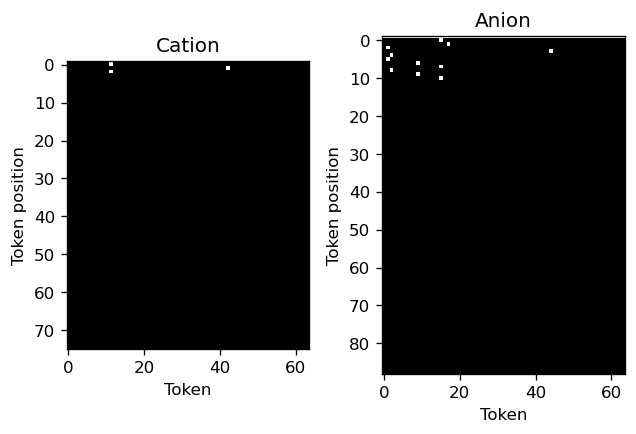

In [133]:
argument= np.argmin(v_cat)

tensor_cat=one_hot_encoded_cation[argument]
array_cat = tensor_cat.numpy()

tensor_an=one_hot_encoded_anion[argument]
array_an = tensor_an.numpy()


fig, axs = plt.subplots(1, 2, dpi=120)
plt.subplots_adjust(wspace=0.3) 
axs[0].imshow(array_cat, cmap='gray', aspect='equal')
axs[0].set_title('Cation')
axs[0].set_ylim([np.shape(array_cat)[0]-1,-1])

axs[1].imshow(array_an, cmap='gray', aspect='equal')
axs[1].set_title('Anion')
axs[1].set_ylim([np.shape(array_an)[0]-1,-1])

for ax in axs.flat:
    ax.set(xlabel='Token', ylabel='Token position')

print("mass cation: ", cation_mass[argument])
print("mass anion: ", anion_mass[argument])

mass cation:  925.721
mass anion:  66.042


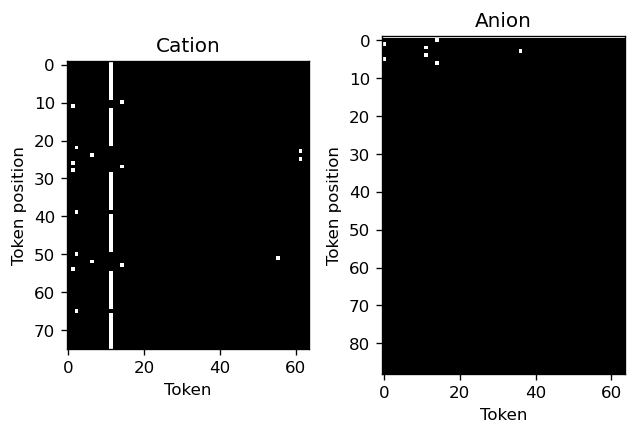

In [134]:
argument= np.argmax(v_cat)

tensor_cat=one_hot_encoded_cation[argument]
array_cat = tensor_cat.numpy()

tensor_an=one_hot_encoded_anion[argument]
array_an = tensor_an.numpy()


fig, axs = plt.subplots(1, 2, dpi=120)
plt.subplots_adjust(wspace=0.3) 
axs[0].imshow(array_cat, cmap='gray', aspect='equal')
axs[0].set_title('Cation')
axs[0].set_ylim([np.shape(array_cat)[0]-1,-1])

axs[1].imshow(array_an, cmap='gray', aspect='equal')
axs[1].set_title('Anion')
axs[1].set_ylim([np.shape(array_an)[0]-1,-1])

for ax in axs.flat:
    ax.set(xlabel='Token', ylabel='Token position')

print("mass cation: ", cation_mass[argument])
print("mass anion: ", anion_mass[argument])

mass cation:  97.138
mass anion:  35.454


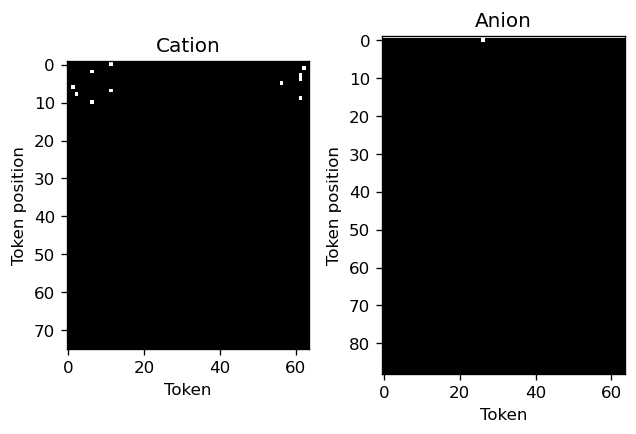

In [135]:
argument= np.argmin(v_an)

tensor_cat=one_hot_encoded_cation[argument]
array_cat = tensor_cat.numpy()

tensor_an=one_hot_encoded_anion[argument]
array_an = tensor_an.numpy()


fig, axs = plt.subplots(1, 2, dpi=120)
plt.subplots_adjust(wspace=0.3) 
axs[0].imshow(array_cat, cmap='gray', aspect='equal')
axs[0].set_title('Cation')
axs[0].set_ylim([np.shape(array_cat)[0]-1,-1])

axs[1].imshow(array_an, cmap='gray', aspect='equal')
axs[1].set_title('Anion')
axs[1].set_ylim([np.shape(array_an)[0]-1,-1])

for ax in axs.flat:
    ax.set(xlabel='Token', ylabel='Token position')
    
    
print("mass cation: ", cation_mass[argument])
print("mass anion: ", anion_mass[argument])



mass cation:  483.856
mass anion:  679.036


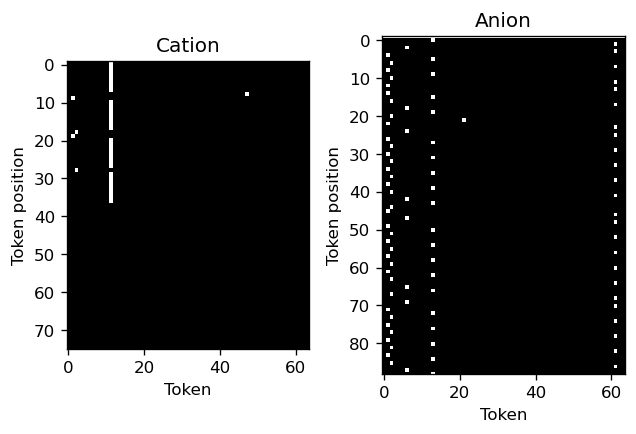

In [136]:
argument= np.argmax(v_an)

tensor_cat=one_hot_encoded_cation[argument]
array_cat = tensor_cat.numpy()

tensor_an=one_hot_encoded_anion[argument]
array_an = tensor_an.numpy()


fig, axs = plt.subplots(1, 2, dpi=120)
plt.subplots_adjust(wspace=0.3) 
axs[0].imshow(array_cat, cmap='gray', aspect='equal')
axs[0].set_title('Cation')
axs[0].set_ylim([np.shape(array_cat)[0]-1,-1])

axs[1].imshow(array_an, cmap='gray', aspect='equal')
axs[1].set_title('Anion')
axs[1].set_ylim([np.shape(array_an)[0]-1,-1])

for ax in axs.flat:
    ax.set(xlabel='Token', ylabel='Token position')

print("mass cation: ", cation_mass[argument])
print("mass anion: ", anion_mass[argument])